(1711, 26)


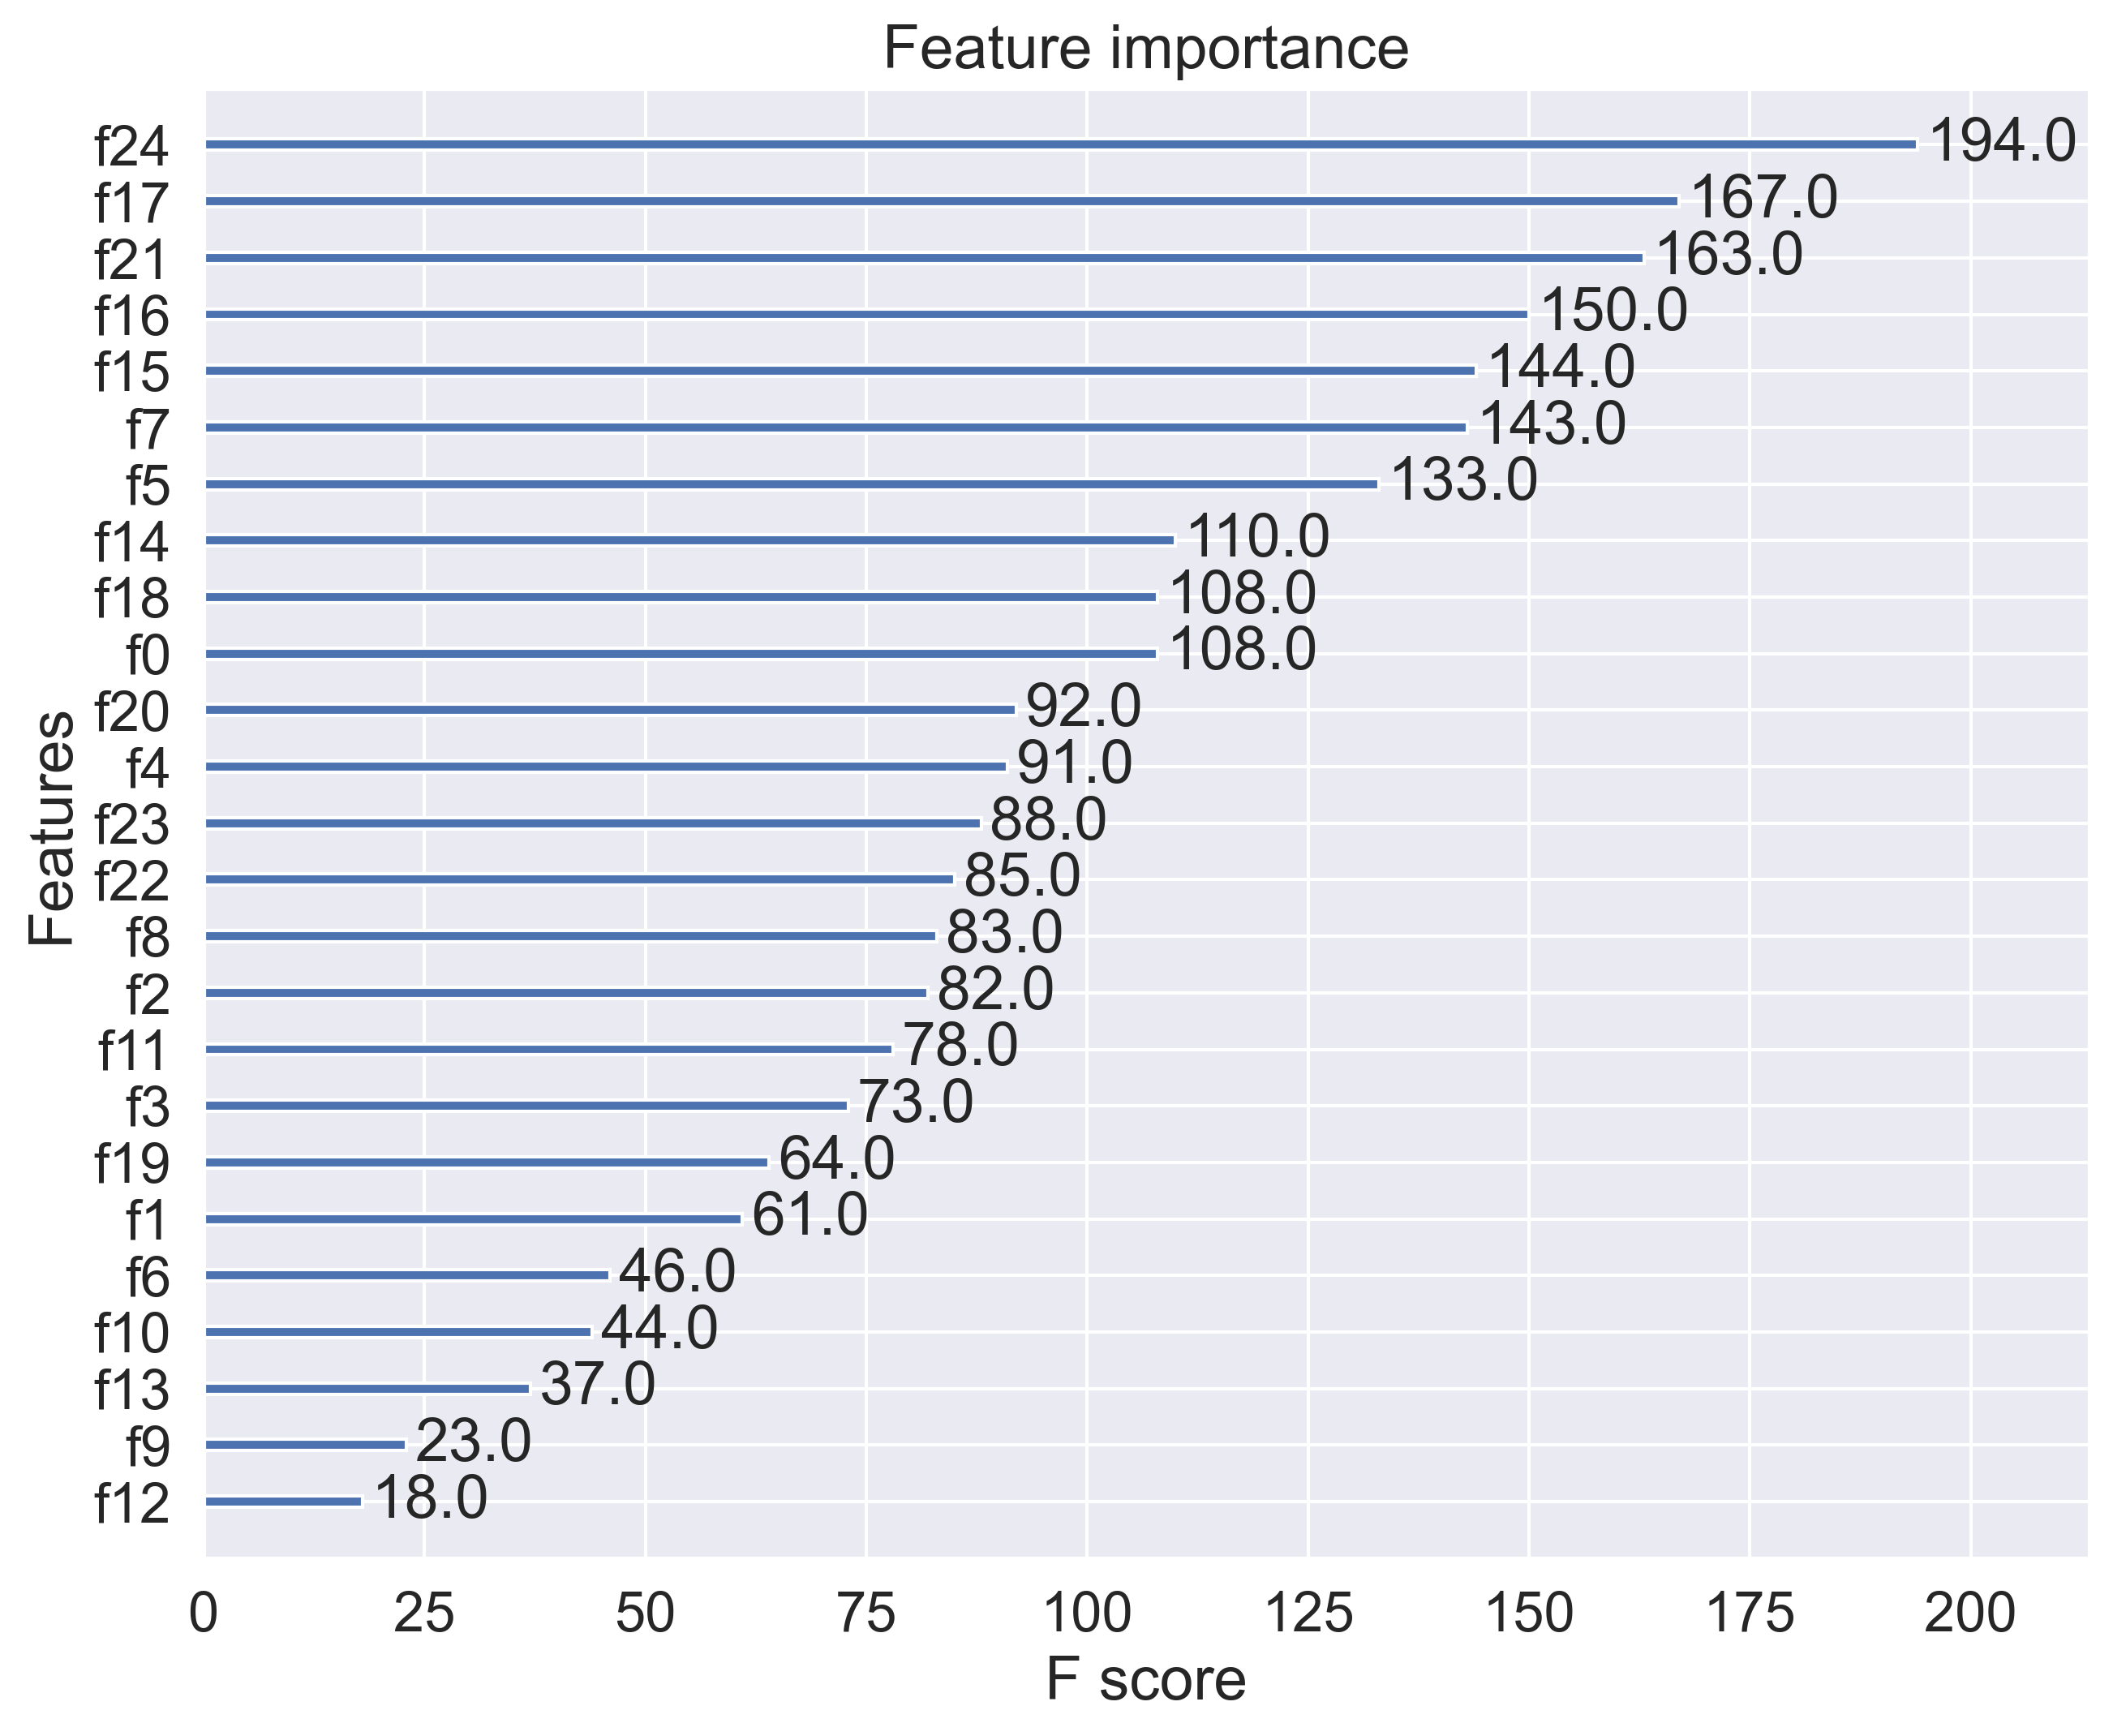

Index = 0,Thresh=0.023, n=25, accuracy: 72.89%
Index = 1,Thresh=0.023, n=24, accuracy: 76.97%
Index = 2,Thresh=0.025, n=23, accuracy: 73.76%
Index = 3,Thresh=0.029, n=22, accuracy: 76.68%
Index = 4,Thresh=0.029, n=21, accuracy: 75.51%
Index = 5,Thresh=0.029, n=20, accuracy: 72.89%
Index = 6,Thresh=0.029, n=19, accuracy: 76.38%
Index = 7,Thresh=0.032, n=18, accuracy: 75.80%
Index = 8,Thresh=0.032, n=17, accuracy: 75.80%
Index = 9,Thresh=0.034, n=16, accuracy: 77.55%
Index =10,Thresh=0.034, n=15, accuracy: 77.84%
Index =11,Thresh=0.034, n=14, accuracy: 77.26%
Index =12,Thresh=0.035, n=13, accuracy: 74.93%
Index =13,Thresh=0.036, n=12, accuracy: 76.68%
Index =14,Thresh=0.038, n=11, accuracy: 76.09%
Index =15,Thresh=0.039, n=10, accuracy: 75.51%
Index =16,Thresh=0.041, n=9, accuracy: 75.51%
Index =17,Thresh=0.043, n=8, accuracy: 74.05%
Index =18,Thresh=0.047, n=7, accuracy: 74.34%
Index =19,Thresh=0.051, n=6, accuracy: 77.84%
Index =20,Thresh=0.052, n=5, accuracy: 74.64%
Index =21,Thresh=0

In [6]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score,accuracy_score,roc_auc_score
from scipy.stats import mode
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 300
sns.set(font_scale = 1.5)

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance


from imblearn.over_sampling import SMOTE,ADASYN,SVMSMOTE
from sklearn.preprocessing import Normalizer,MinMaxScaler
from imblearn.pipeline import Pipeline
sampler = ADASYN()
norm = MinMaxScaler()

n = "Dataset/corr/"
d = "PC5"
loc_dat = "C:/Users/shubh/Desktop/XGB DNN/1407/"+ n + d + ".csv"
loc_res = "C:/Users/shubh/Desktop/XGB DNN/1407/Dataset/corr+fs/" + d + ".csv"
m = d + ".csv"
df = pd.read_csv(loc_dat)

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(df.shape)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0,stratify=y)
Xtrain,ytrain = sampler.fit_resample(X_train,y_train)
Xtrain = norm.fit_transform(Xtrain)
Xtest = norm.transform(X_test)
model = XGBClassifier(verbosity=0)
model.fit(Xtrain, ytrain)
model.feature_importances_
plot_importance(model)
plt.savefig("PC5.png")
pyplot.show()
threshold = np.sort(model.feature_importances_)
feat=[]

dr = pd.DataFrame()
for thresh, i in zip(threshold,range(60)):
    a=[]
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    selected_features = X.columns[selection.get_support()]
    ds = pd.Series(selected_features)
    feat.append(selected_features)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    #predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, y_pred)
    print("Index =%2d,Thresh=%.3f, n=%d, accuracy: %.2f%%" % (i,thresh, select_X_train.shape[1], accuracy*100.0))
    a.append(i)
    a.append(thresh)
    a.append(int(select_X_train.shape[1]))
    a.append(accuracy*100.0)
    dr = pd.concat([dr,pd.Series(a)],axis=1)
dr.index = ['Index','Threshold','n_feat','Accuracy']
dr.columns = range(1,i+2,1)
dx=dr.transpose()
#dx.to_csv(loc_res)


In [26]:
v =18
z=[]

X_train = X_train[feat[v]]
X_test = X_test[feat[v]]
X = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])
# p = Pipeline([('smote',ADASYN()),('norm',MinMaxScaler()),('clf',model)])
# acc = cross_val_score(p,X,y,cv=10,scoring='accuracy').mean()
# roc = cross_val_score(p,X,y,cv=10,scoring='roc_auc').mean()
# f1 = cross_val_score(p,X,y,cv=10,scoring='f1').mean()
# z.append(acc)
# z.append(roc)
# z.append(f1)
# dl = pd.concat([dl,pd.Series(z)],axis=1)
# dl.index=['Accuracy','ROC','F1Score']
c = pd.concat([X,y],axis=1)
c.to_csv(m)

In [26]:
c

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_DENSITY,DESIGN_DENSITY,ESSENTIAL_DENSITY,PARAMETER_COUNT,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,HALSTEAD_EFFORT,MAINTENANCE_SEVERITY,NORMALIZED_CYLOMATIC_COMPLEXITY,PERCENT_COMMENTS,Defective
229,27,3,2,1,19,0.09,1.00,0.00,1,37.27,15.43,8872.37,0.50,0.03,47.62,1
27,15,11,4,5,19,0.18,0.67,0.00,2,30.61,23.10,16332.07,0.17,0.08,46.15,0
179,40,5,3,2,11,0.10,1.00,0.00,1,44.75,18.67,15592.09,0.33,0.04,31.71,1
271,4,7,1,3,0,0.18,1.00,0.00,2,40.01,18.29,13377.17,0.25,0.15,13.64,0
137,2,7,7,3,35,0.10,0.25,0.67,3,60.50,14.75,13163.37,0.75,0.05,50.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,77,19,6,4,31,0.08,1.00,0.00,1,208.02,26.30,143936.36,0.10,0.04,21.60,0
226,39,23,10,4,58,0.17,0.58,0.36,5,52.05,21.71,24543.69,0.42,0.07,47.69,0
266,156,63,5,53,27,0.23,0.31,0.35,1,78.34,51.47,207526.23,0.38,0.10,48.48,0
218,9,17,4,0,0,0.38,0.89,0.00,0,30.54,11.65,4143.37,0.11,0.26,0.00,0


In [29]:
c = pd.concat([X,y],axis=1)
c

,LOC_BLANK,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_DENSITY,DESIGN_DENSITY,ESSENTIAL_DENSITY,PARAMETER_COUNT,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,HALSTEAD_EFFORT,HALSTEAD_LEVEL,MAINTENANCE_SEVERITY,NUM_UNIQUE_OPERATORS,PERCENT_COMMENTS,Defective
229,27,2,1,19,0.09,1.00,0.00,1,37.27,15.43,8872.37,0.06,0.50,12,47.62,1
27,15,4,5,19,0.18,0.67,0.00,2,30.61,23.10,16332.07,0.04,0.17,21,46.15,0
179,40,3,2,11,0.10,1.00,0.00,1,44.75,18.67,15592.09,0.05,0.33,20,31.71,1
271,4,1,3,0,0.18,1.00,0.00,2,40.01,18.29,13377.17,0.05,0.25,16,13.64,0
137,2,7,3,35,0.10,0.25,0.67,3,60.50,14.75,13163.37,0.07,0.75,19,50.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,77,6,4,31,0.08,1.00,0.00,1,208.02,26.30,143936.36,0.04,0.10,26,21.60,0
226,39,10,4,58,0.17,0.58,0.36,5,52.05,21.71,24543.69,0.05,0.42,24,47.69,0
266,156,5,53,27,0.23,0.31,0.35,1,78.34,51.47,207526.23,0.02,0.38,32,48.48,0
218,9,4,0,0,0.38,0.89,0.00,0,30.54,11.65,4143.37,0.09,0.11,11,0.00,0


In [15]:
feat[v]

Index(['BRANCH_COUNT', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS',
       'CYCLOMATIC_DENSITY', 'DESIGN_DENSITY', 'HALSTEAD_EFFORT'],
      dtype='object')

In [2]:
threshold

array([0.02002438, 0.02183769, 0.02373529, 0.0239784 , 0.02484837,
       0.02489236, 0.02642575, 0.02732095, 0.02974175, 0.03071472,
       0.03142028, 0.03146864, 0.03266544, 0.03283503, 0.0328663 ,
       0.03398878, 0.04402545, 0.04807721, 0.04874004, 0.05528601,
       0.05653626, 0.06399406, 0.06838911, 0.07797927, 0.08820847],
      dtype=float32)